In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq '/content/drive/MyDrive/데이터 분석 대회/train_resized_64.zip' -d 'training'

In [3]:
!unzip -qq '/content/drive/MyDrive/데이터 분석 대회/valid_resized_64.zip' -d 'test'

In [4]:
# 1 - 1
import os

folder_path = "/content/test"
file_count = sum([len(files) for r, d, files in os.walk(folder_path)])
print(file_count)

folder_path = "/content/training"
file_count = sum([len(files) for i, j, files in os.walk(folder_path)])
sub_count = sum([len(j) for i, j, files in os.walk(folder_path)])
print(file_count)

16200
129600


In [1]:
# 1 - 2 (Training)
import os
import shutil

def test(training_data):
  three = []
  two = []
  one = []

  for dirpath, dirname, filename in os.walk(training_data):
    for file in filename:
      file_test_result = file.split("_")
      # print(file_test_result)
      if '03' in file_test_result[-1]:
        three.append(os.path.join(dirpath, file))
      elif '02' in file_test_result[-1]:
        two.append(os.path.join(dirpath, file))
      elif '01' in file_test_result[-1]:
        one.append(os.path.join(dirpath, file))

  return three, two, one

training_data = "/content/training/new_train_resized"

three, two, one = test(training_data)

print(len(three))
print(len(two))
print(len(one))

43200
43200
43200


In [6]:
# 1 - 2 (Test)
import os
import shutil

def test(test_data):
  three = []
  two = []
  one = []

  for dirpath, dirname, filename in os.walk(test_data):
    for file in filename:
      file_test_result = file.split("_")
      # print(file_test_result)
      if '03' in file_test_result[-1]:
        three.append(os.path.join(dirpath, file))
      elif '02' in file_test_result[-1]:
        two.append(os.path.join(dirpath, file))
      elif '01' in file_test_result[-1]:
        one.append(os.path.join(dirpath, file))

  return three, two, one

test_data = "/content/test"

three, two, one = test(test_data)

print(len(three))
print(len(two))
print(len(one))

5400
5400
5400


In [ ]:
# 2 - 1 (Training)
from PIL import Image
import os

def new_img(input_folder, output_folder, new_size):
    for dirpath, dirname, filename in os.walk(input_folder):
        for filename2 in filename:

            input_path = os.path.join(dirpath, filename2)
            output_path = os.path.join(output_folder, filename2)

            with Image.open(input_path) as image:
                new_img = image.resize(new_size)
                new_img.save(output_path)
                print("완료! {}".format(filename2))

input_folder = '/content/training'
output_folder = '/content/new_training'
new_size = (64, 64)

new_img(input_folder, output_folder, new_size)

In [ ]:
# 2 - 1 (Test)
from PIL import Image
import os

def new_img(input_folder, output_folder, new_size):
    for dirpath, dirname, filename in os.walk(input_folder):
        for filename2 in filename:

            input_path = os.path.join(dirpath, filename2)
            output_path = os.path.join(output_folder, filename2)

            with Image.open(input_path) as image:
                new_img = image.resize(new_size)
                new_img.save(output_path)
                print("완료! {}".format(filename2))

input_folder = '/content/test'
output_folder = '/content/new_test'
new_size = (64, 64)

new_img(input_folder, output_folder, new_size)

In [ ]:
# 2 - 2
from google.colab import drive
drive.mount('/content/drive')

!unzip '압축 풀 파일 경로'

In [ ]:
# 3 - 1 (이진분류)
import os
import shutil
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # 콜백 추가
from tensorflow.keras import backend as K

# 이미지 파일이 저장된 최상위 디렉토리 경로
root_directory = '/content/drive/MyDrive/데이터 분석 대회/new_train_resized'

# 클래스별 디렉토리 이름
class1_directory = '마스크 미착용'  # 마스크 미착용
class2_directory = '마스크 착용'  # 마스크 착용

# 이미지 파일 이름에 따라 클래스를 결정하고 해당 클래스의 디렉토리로 파일을 이동
for root, directories, files in os.walk(root_directory):
    for filename in files:
        if filename.endswith((".jpg", ".JPG")):
            # 파일 이름에 따라 클래스 결정
            if filename[12:14] == '01':  # 마스크 미착용
                class_name = class1_directory
            elif filename[12:14] in ['02', '03']:  # 마스크 착용
                class_name = class2_directory
            else:
                continue  # '01', '02', '03'이 아닌 경우는 무시

            # 클래스 이름으로 디렉토리 생성 (이미 디렉토리가 존재하면 생성하지 않음)
            class_directory = os.path.join(root_directory, class_name)
            os.makedirs(class_directory, exist_ok=True)

            # 이미지 파일을 클래스 디렉토리로 이동
            src_file = os.path.join(root, filename)
            dst_file = os.path.join(class_directory, filename)
            shutil.move(src_file, dst_file)

# 학습 데이터와 검증 데이터가 저장된 디렉토리 경로
train_directory = '/content/drive/MyDrive/데이터 분석 대회/new_train_resized'  # 실제 학습 데이터 디렉토리 경로로 변경
val_directory = '/content/drive/MyDrive/데이터 분석 대회/new_valid_resized'  # 실제 검증 데이터 디렉토리 경로로 변경

# 이미지 크기와 채널 수
image_size = (64, 64)
channels = 3

# 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

# 이미지 데이터 제네레이터 생성
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    directory=train_directory,  # 학습 데이터가 있는 디렉토리 경로
    target_size=image_size,
    class_mode='binary',
    batch_size=32
)

val_gen = datagen.flow_from_directory(
    directory=val_directory,  # 검증 데이터가 있는 디렉토리 경로
    target_size=image_size,
    class_mode='binary',
    batch_size=32
)


# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 콜백 리스트
callbacks = [early_stopping]

# 모델 훈련
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks,
    workers=4
)

Found 129600 images belonging to 2 classes.
Found 16200 images belonging to 2 classes.
Epoch 1/20
4050/4050 [==============================] - 1157s 285ms/step - loss: 0.0912 - accuracy: 0.9665 - f1_score: 0.9748 - val_loss: 0.0563 - val_accuracy: 0.9823 - val_f1_score: 0.9862
Epoch 2/20
4050/4050 [==============================] - 105s 26ms/step - loss: 0.0351 - accuracy: 0.9886 - f1_score: 0.9912 - val_loss: 0.0557 - val_accuracy: 0.9849 - val_f1_score: 0.9882
Epoch 3/20
4050/4050 [==============================] - 105s 26ms/step - loss: 0.0221 - accuracy: 0.9927 - f1_score: 0.9943 - val_loss: 0.0683 - val_accuracy: 0.9794 - val_f1_score: 0.9840
Epoch 4/20
4050/4050 [==============================] - 105s 26ms/step - loss: 0.0164 - accuracy: 0.9949 - f1_score: 0.9961 - val_loss: 0.0695 - val_accuracy: 0.9834 - val_f1_score: 0.9872
Epoch 5/20
4050/4050 [==============================] - 105s 26ms/step - loss: 0.0128 - accuracy: 0.9959 - f1_score: 0.9969 - val_loss: 0.0586 - val_accura

In [ ]:
# 3 - 1 (F1 Score)
# 검증 데이터에 대한 f1_score
print("검증 데이터에 대한 f1_score:")
print(history.history['val_f1_score'])

# f1_score 보기
from tensorflow.keras.metrics import Precision, Recall

# 정밀도와 재현율 메트릭 객체 생성
precision = Precision()
recall = Recall()

# 검증 데이터에서 예측
val_gen.reset()  # 제네레이터 상태 초기화
predictions = model.predict(val_gen)

# 이진 분류 문제이므로 예측값을 0.5를 기준으로 0 또는 1로 변환
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# 실제 라벨 값을 문자열에서 정수로 변환
true_labels = [int(label) for label in val_gen.classes]

# 정밀도와 재현율 업데이트
precision.update_state(true_labels, predictions)
recall.update_state(true_labels, predictions)

# F1 점수 계산
f1_score = 2 * (precision.result().numpy() * recall.result().numpy()) / \
            (precision.result().numpy() + recall.result().numpy())

print(f"F1 Score: {f1_score}")

검증 데이터에 대한 f1_score:
[0.9861526489257812, 0.9882474541664124, 0.9839827418327332, 0.9872145056724548, 0.9897864460945129]
507/507 [==============================] - 18s 35ms/step
F1 Score: 0.6643682428974251


In [ ]:
# 3 - 2 (불균형 문제 확인)
import numpy as np

# 훈련 데이터 클래스 불균형 확인
train_classes, train_counts = np.unique(train_gen.classes, return_counts=True)
for class_name, class_count in zip(train_classes, train_counts):
    print(f'학습 데이터 - 클래스 {class_name}: {class_count}개')

# 검증 데이터 클래스 불균형 확인
val_classes, val_counts = np.unique(val_gen.classes, return_counts=True)
for class_name, class_count in zip(val_classes, val_counts):
    print(f'검증 데이터 - 클래스 {class_name}: {class_count}개')

학습 데이터 - 클래스 0: 43200개
학습 데이터 - 클래스 1: 86400개
검증 데이터 - 클래스 0: 5400개
검증 데이터 - 클래스 1: 10800개


In [ ]:
# 3 - 2 (불균형 문제 해결)
import os
import shutil
import numpy as np

# 원본 학습 데이터와 검증 데이터 디렉토리
original_train_directory = '/content/drive/MyDrive/데이터 분석 대회/new_train_resized'
original_val_directory = '/content/drive/MyDrive/데이터 분석 대회/new_valid_resized'

# 언더샘플링된 데이터를 저장할 디렉토리
undersampled_train_directory = '/content/drive/MyDrive/데이터 분석 대회/undersampled_train'
undersampled_val_directory = '/content/drive/MyDrive/데이터 분석 대회/undersampled_valid'

os.makedirs(undersampled_train_directory, exist_ok=True)
os.makedirs(undersampled_val_directory, exist_ok=True)

# 학습 데이터 언더샘플링
class_directories = [os.path.join(original_train_directory, d) for d in os.listdir(original_train_directory)]
image_files_per_class = [os.listdir(d) for d in class_directories]
min_count = min(len(image_files) for image_files in image_files_per_class)

for directory, image_files in zip(class_directories, image_files_per_class):
    sampled_image_files = np.random.choice(image_files, min_count, replace=False)
    sampled_train_directory = os.path.join(undersampled_train_directory, os.path.basename(directory))
    os.makedirs(sampled_train_directory, exist_ok=True)
    for file in sampled_image_files:
        src = os.path.join(directory, file)
        dst = os.path.join(sampled_train_directory, file)
        shutil.copyfile(src, dst)

# 검증 데이터 언더샘플링
class_directories = [os.path.join(original_val_directory, d) for d in os.listdir(original_val_directory)]
image_files_per_class = [os.listdir(d) for d in class_directories]
min_count = min(len(image_files) for image_files in image_files_per_class)

for directory, image_files in zip(class_directories, image_files_per_class):
    sampled_image_files = np.random.choice(image_files, min_count, replace=False)
    sampled_val_directory = os.path.join(undersampled_val_directory, os.path.basename(directory))
    os.makedirs(sampled_val_directory, exist_ok=True)
    for file in sampled_image_files:
        src = os.path.join(directory, file)
        dst = os.path.join(sampled_val_directory, file)
        shutil.copyfile(src, dst)

In [ ]:
# 3 - 2 (Accuracy, Precision, Recall, F1 Score)
from tensorflow.keras.metrics import Precision, Recall, Accuracy

# Accuracy, 정밀도, 재현율 메트릭 객체 생성
accuracy = Accuracy()
precision = Precision()
recall = Recall()

# 검증 데이터에서 예측
val_gen.reset()  # 제네레이터 상태 초기화
predictions = model.predict(val_gen)

# 이진 분류 문제이므로 예측값을 0.5를 기준으로 0 또는 1로 변환
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# 실제 라벨 값을 문자열에서 정수로 변환
true_labels = [int(label) for label in val_gen.classes]

# Accuracy, 정밀도, 재현율 업데이트
accuracy.update_state(true_labels, predictions)
precision.update_state(true_labels, predictions)
recall.update_state(true_labels, predictions)

# F1 점수 계산
f1_score = 2 * (precision.result().numpy() * recall.result().numpy()) / \
            (precision.result().numpy() + recall.result().numpy())

print(f"Accuracy: {accuracy.result().numpy()}")
print(f"Precision: {precision.result().numpy()}")
print(f"Recall: {recall.result().numpy()}")
print(f"F1 Score: {f1_score}")

338/338 [==============================] - 11s 31ms/step
Accuracy: 0.5047222375869751
Precision: 0.5047004818916321
Recall: 0.5070370435714722
F1 Score: 0.5058660409304978


In [ ]:
# 3 - 3
# 성능향상 - 6번
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # BatchNormalization import
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K

train_directory = '/content/drive/MyDrive/데이터 분석 대회/undersampled_train'
val_directory = '/content/drive/MyDrive/데이터 분석 대회/undersampled_valid'
image_size = (64, 64)
channels = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], channels)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # BatchNormalization layer added
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # BatchNormalization layer added
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # BatchNormalization layer added
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # BatchNormalization layer added
model.add(Dense(1, activation='sigmoid'))

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    directory=train_directory,
    target_size=image_size,
    class_mode='binary',
    batch_size=64
)

val_gen = datagen.flow_from_directory(
    directory=val_directory,
    target_size=image_size,
    class_mode='binary',
    batch_size=64
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
callbacks = [early_stopping]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks,
    workers=4
)

Found 86400 images belonging to 2 classes.
Found 10800 images belonging to 2 classes.
Epoch 1/20
1350/1350 [==============================] - 69s 49ms/step - loss: 0.1205 - accuracy: 0.9559 - f1_score: 0.9548 - val_loss: 0.1116 - val_accuracy: 0.9544 - val_f1_score: 0.9550
Epoch 2/20
1350/1350 [==============================] - 68s 50ms/step - loss: 0.0511 - accuracy: 0.9831 - f1_score: 0.9827 - val_loss: 0.1248 - val_accuracy: 0.9536 - val_f1_score: 0.9515
Epoch 3/20
1350/1350 [==============================] - 67s 49ms/step - loss: 0.0373 - accuracy: 0.9873 - f1_score: 0.9870 - val_loss: 0.0448 - val_accuracy: 0.9837 - val_f1_score: 0.9832
Epoch 4/20
1350/1350 [==============================] - 66s 49ms/step - loss: 0.0316 - accuracy: 0.9893 - f1_score: 0.9891 - val_loss: 0.2125 - val_accuracy: 0.9131 - val_f1_score: 0.9194
Epoch 5/20
1350/1350 [==============================] - 67s 50ms/step - loss: 0.0256 - accuracy: 0.9914 - f1_score: 0.9912 - val_loss: 0.1089 - val_accuracy: 0.95

169/169 [==============================] - 11s 65ms/step


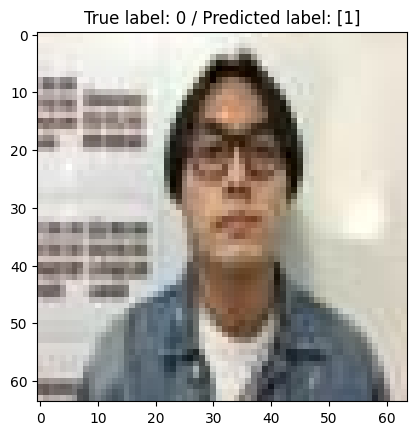

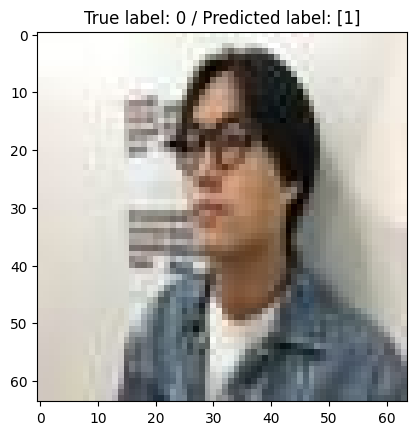

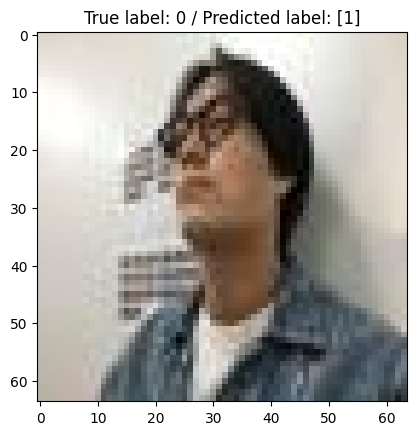

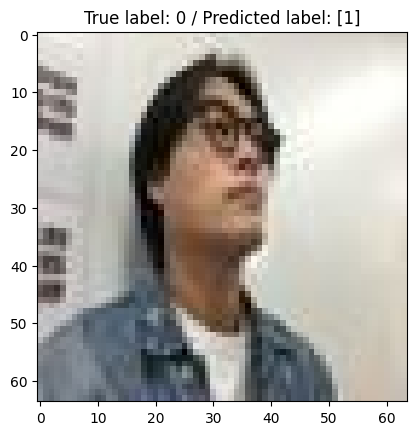

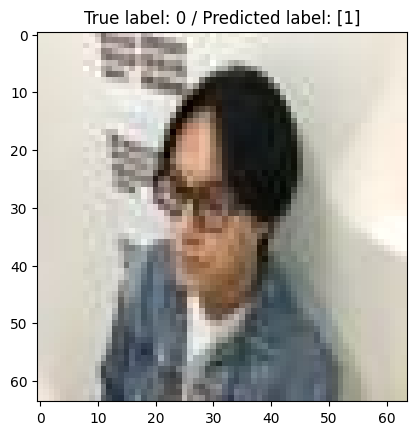

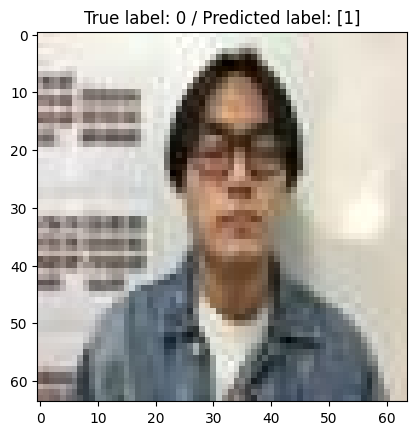

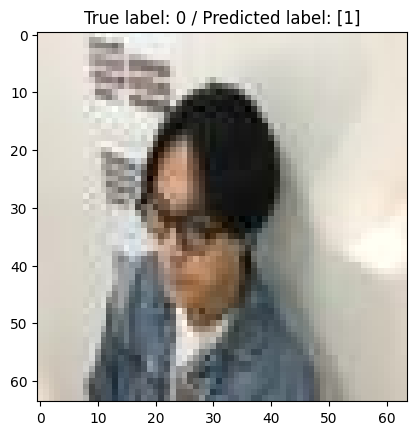

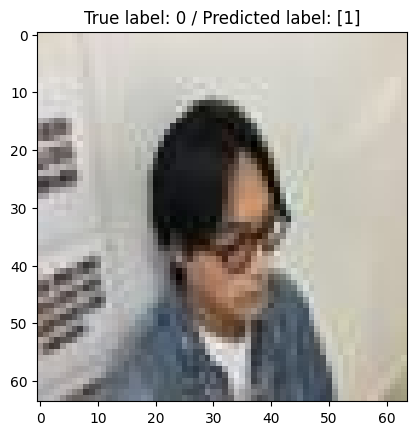

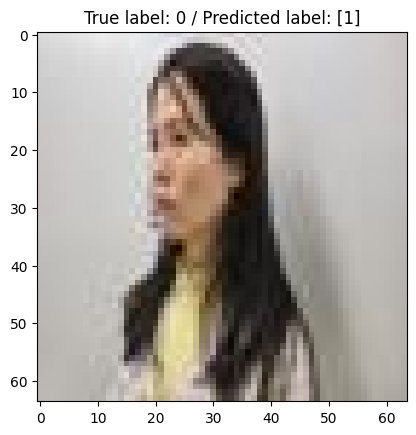

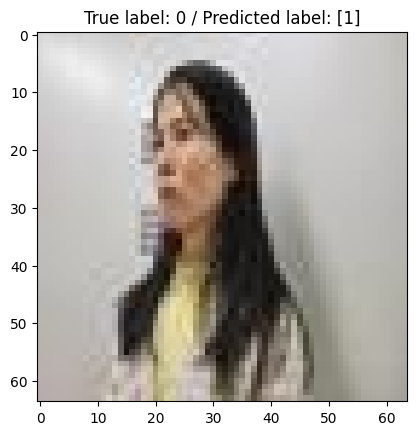

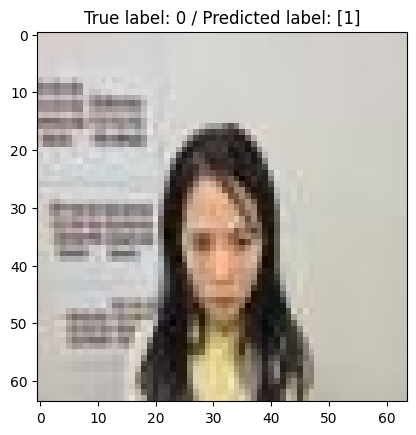

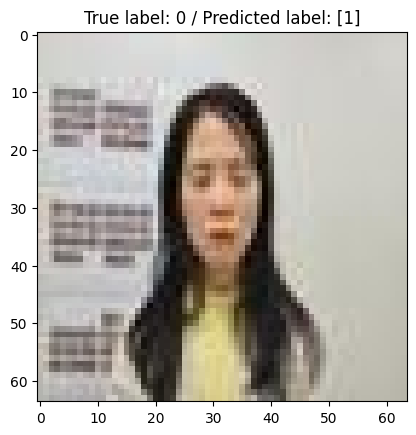

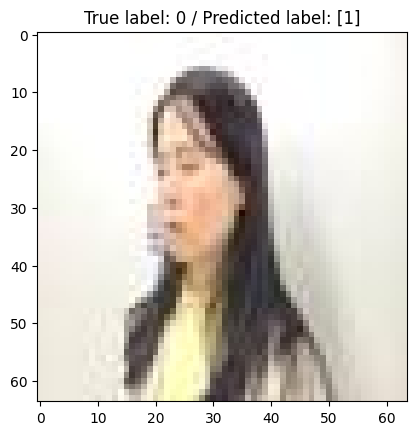

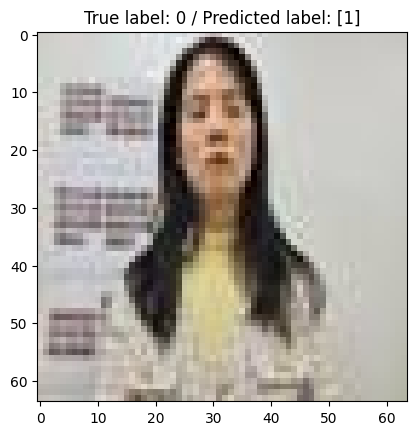

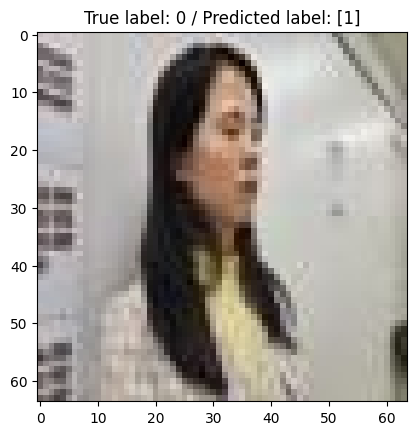

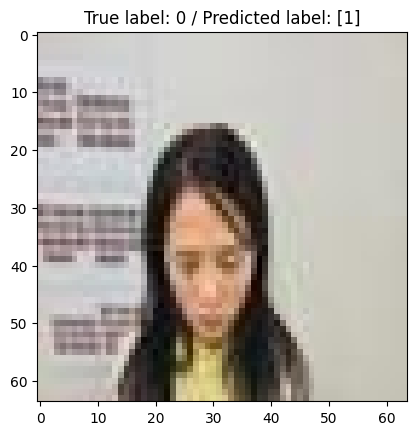

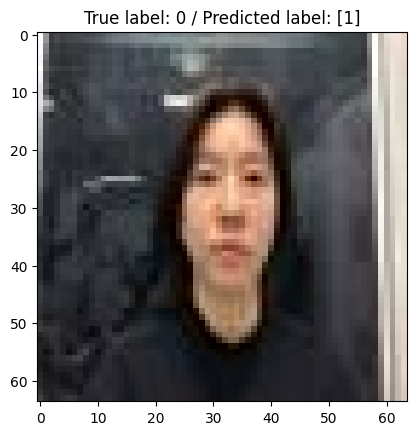

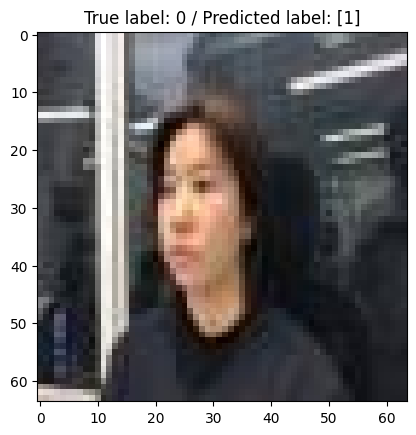

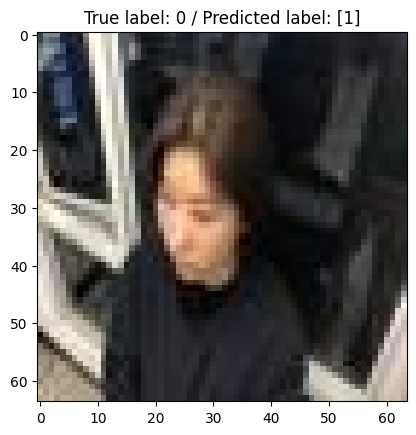

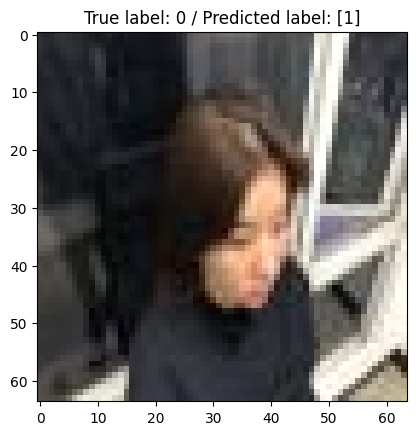

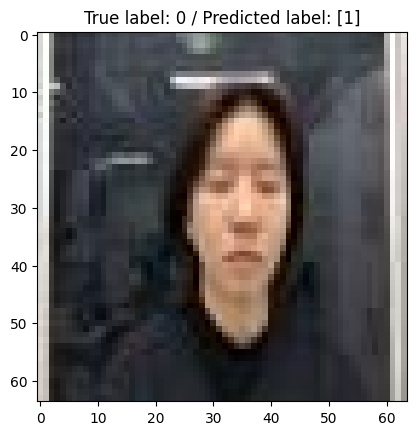

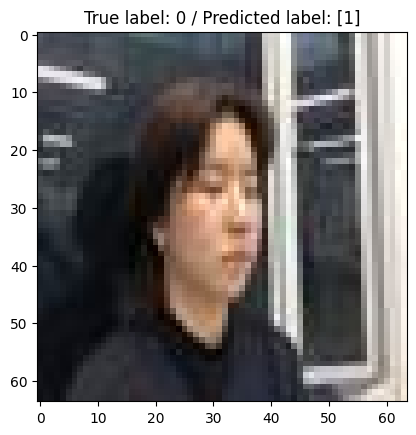

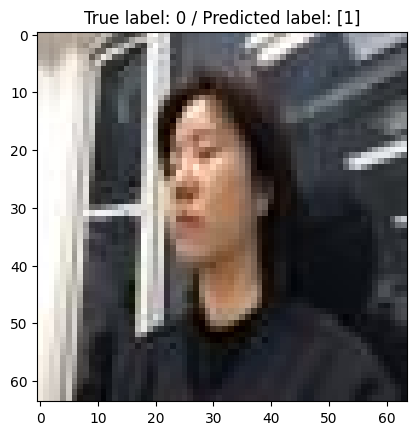

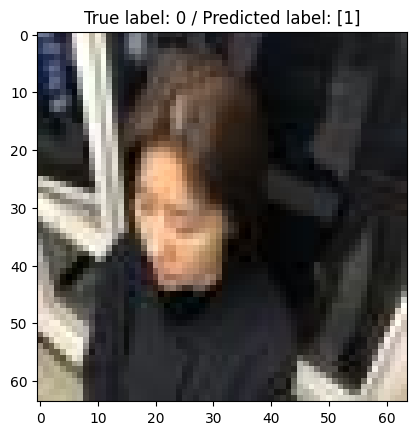

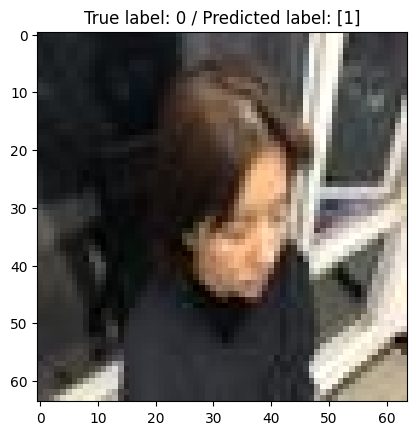

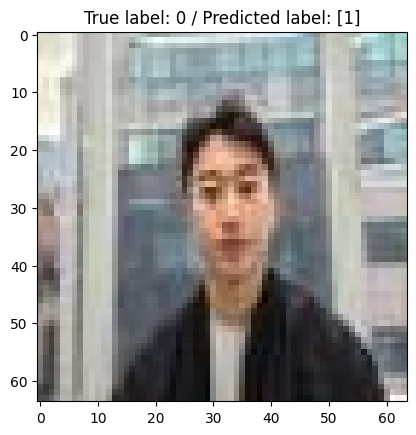

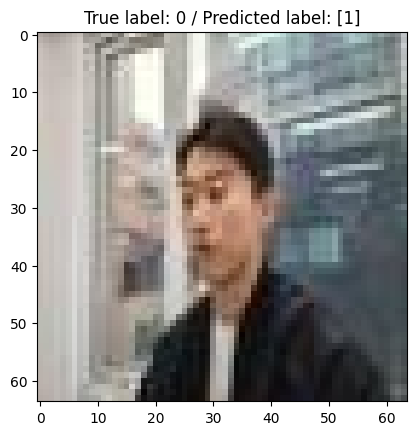

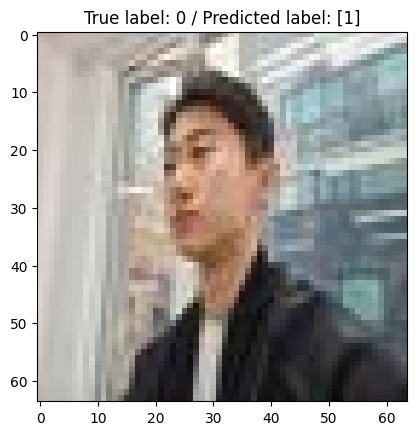

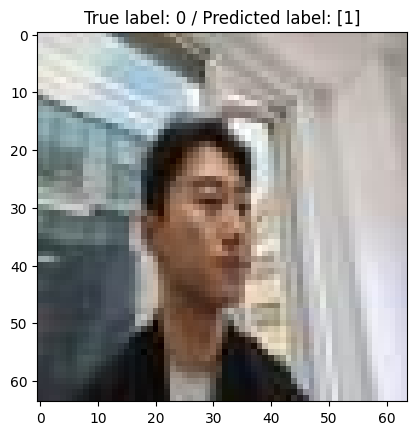

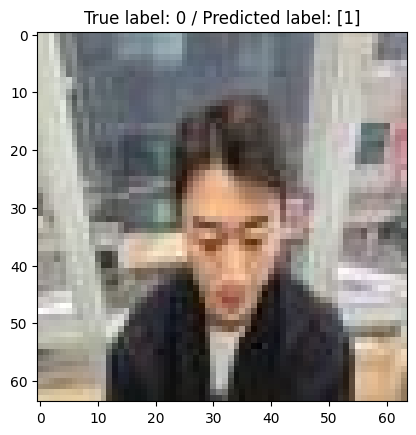

In [ ]:
# 3 - 4
import numpy as np
import matplotlib.pyplot as plt

# 검증 데이터셋에서 예측 수행
predictions = model.predict(val_gen, steps=len(val_gen))

# 예측 결과를 이진 클래스로 변환
binary_predictions = np.where(predictions > 0.5, 1, 0)

# 실제 레이블과 비교
misclassified = np.where(binary_predictions.reshape(-1) != val_gen.classes)

# 잘못 분류된 이미지의 인덱스를 가져옴
misclassified_idxs = misclassified[0]

# 잘못 분류된 이미지를 시각화 (처음 10개만)
for i, idx in enumerate(misclassified_idxs[:30]):
    # 이미지 로드
    img = plt.imread(val_gen.filepaths[idx])

    # 실제 레이블과 예측 레이블 표시
    plt.figure(i)
    plt.title(f'True label: {val_gen.classes[idx]} / Predicted label: {binary_predictions[idx]}')
    plt.imshow(img)
    plt.show()